In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
df = pd.read_csv("insurance.csv")
df.head()

,birth_date,gender,bmi,child,smoking,region,insurance_price
0,2002,female,27.9,0,yes,southwest,16884.92
1,2003,male,33.8,1,no,southeast,1725.55
2,1993,male,33.0,3,no,southeast,4449.46
3,1988,male,22.7,0,no,northwest,21984.47
4,1989,male,28.9,0,no,northwest,3866.86


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
birth_date         1338 non-null int64
gender             1337 non-null object
bmi                1336 non-null float64
child              1338 non-null int64
smoking            1338 non-null object
region             1338 non-null object
insurance_price    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [361]:
df.isnull().sum()

birth_date         0
gender             1
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [362]:
df.describe()

,birth_date,bmi,child,insurance_price
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,1981.792975,30.680539,1.094918,13270.422414
std,14.049960,6.089223,1.205493,12110.011240
min,1957.000000,16.000000,0.000000,1121.870000
25%,1970.000000,26.300000,0.000000,4740.287500
50%,1982.000000,30.400000,1.000000,9382.030000
75%,1994.000000,34.700000,2.000000,16639.915000
max,2003.000000,53.100000,5.000000,63770.430000


In [363]:
from datetime import date

In [364]:
date.today()

datetime.date(2021, 10, 4)

In [365]:
date.today().year

2021

In [366]:
# we will change birth_date values to age
df["birth_date"] = date.today().year - df["birth_date"]
df.head()

,birth_date,gender,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [367]:
df.rename({"birth_date":"age", "gender":"sex"}, axis=1, inplace=True) # rename the birh_date column
df.head()

,age,sex,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [368]:
df.describe()

,age,bmi,child,insurance_price
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,39.207025,30.680539,1.094918,13270.422414
std,14.049960,6.089223,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [369]:
df[["sex", "region", "smoking"]].describe() # non_numeric values' statistics

,sex,region,smoking
count,1337,1338,1338
unique,2,4,2
top,male,southeast,no
freq,675,364,1064


In [370]:
df.isnull().sum()

age                0
sex                1
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [371]:
df[df["sex"].isnull()]

,age,sex,bmi,child,smoking,region,insurance_price
73,58,NaN,32.0,1,no,southeast,11946.63


In [372]:
df[(df["age"] > 50 ) & (df["age"] < 60 )]["sex"].value_counts()

female    123
male      118
Name: sex, dtype: int64

In [373]:
df.loc[df[df["sex"].isnull()].index, "sex"] = "female"

In [374]:
df["sex"].isnull().sum()

0

In [375]:
df.loc[73]

age                       58
sex                   female
bmi                       32
child                      1
smoking                   no
region             southeast
insurance_price      11946.6
Name: 73, dtype: object

In [376]:
df.isnull().sum()

age                0
sex                0
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [377]:
df.groupby("smoking")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
smoking,,,,,,,,
no,1062.0,30.672128,6.031057,16.0,26.3,30.40,34.4,53.1
yes,274.0,30.713139,6.320840,17.2,26.1,30.45,35.2,52.6


In [378]:
df.groupby("sex")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,663.0,30.382202,6.042267,16.8,26.1,30.1,34.3,48.1
male,673.0,30.974443,6.125411,16.0,26.4,30.7,35.1,53.1


In [379]:
df[df["bmi"].isnull()]

,age,sex,bmi,child,smoking,region,insurance_price
17,23,male,NaN,0,no,northeast,2395.17
28,23,male,NaN,1,no,northwest,2775.19


In [380]:
df[(df["age"]==23) & (df["smoking"]=="no") & (df["sex"]=="male")].sort_values(by="bmi")

,age,sex,bmi,child,smoking,region,insurance_price
1027,23,male,18.7,0,no,northwest,21595.38
1114,23,male,24.5,0,no,northeast,2396.10
804,23,male,26.5,0,no,southeast,1815.88
881,23,male,27.4,1,no,northwest,2789.06
479,23,male,32.6,0,no,southeast,1824.29
1092,23,male,32.7,3,no,southwest,3591.48
12,23,male,34.4,0,no,southwest,1826.84
761,23,male,35.2,1,no,southwest,2416.96
817,23,male,37.1,3,no,southwest,3597.60
358,23,male,41.9,0,no,southeast,1837.28


In [381]:
df[(df["age"]==23) & (df["smoking"]=="no") & (df["sex"]=="male")]["bmi"].describe()

count    11.000000
mean     32.854545
std       8.694523
min      18.700000
25%      26.950000
50%      32.700000
75%      36.150000
max      50.400000
Name: bmi, dtype: float64

In [382]:
median = df[(df["age"]==23) & (df["smoking"]=="no") & (df["sex"]=="male")]["bmi"].median()
median

32.7

In [383]:
df["bmi"].fillna(median, inplace=True)

In [384]:
df.loc[17]

age                       23
sex                     male
bmi                     32.7
child                      0
smoking                   no
region             northeast
insurance_price      2395.17
Name: 17, dtype: object

In [385]:
df.isnull().sum()

age                0
sex                0
bmi                0
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

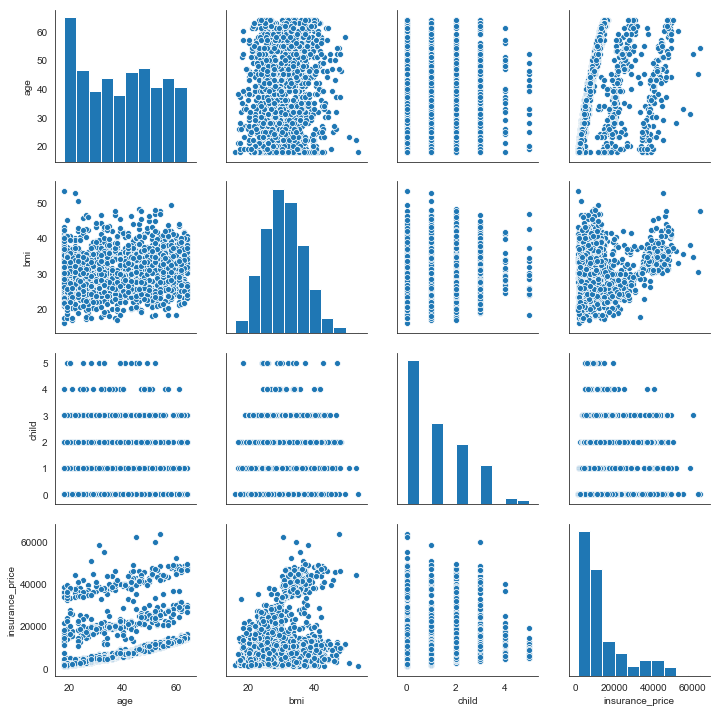

In [386]:
sns.pairplot(df)

### Handling with outliers

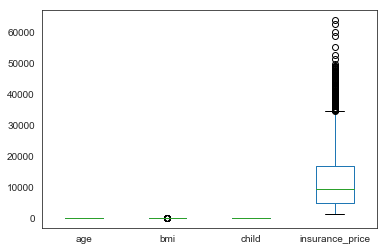

In [387]:
df.plot(kind="box")

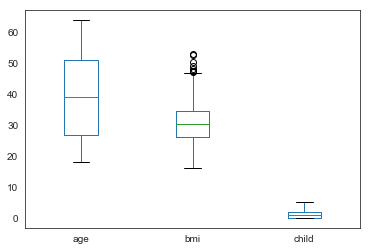

In [388]:
df.drop("insurance_price", axis=1).plot(kind="box")

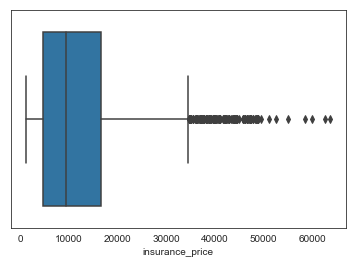

In [389]:
sns.boxplot(df["insurance_price"])

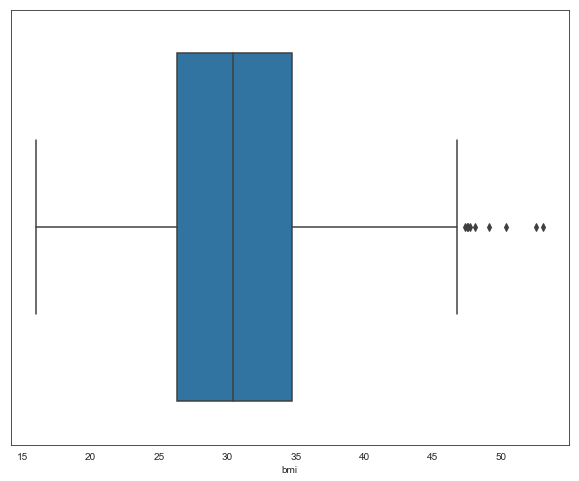

In [390]:
plt.figure(figsize=(10,8))
sns.boxplot(df["bmi"])

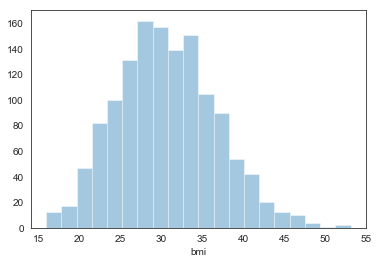

In [391]:
sns.distplot(df["bmi"], bins=20, kde=False)

In [392]:
df["bmi"].describe()

count    1338.000000
mean       30.683558
std         6.085167
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [393]:
df_bmi_log = np.log(df["bmi"])

In [394]:
df_bmi_log.head()

0    3.328627
1    3.520461
2    3.496508
3    3.122365
4    3.363842
Name: bmi, dtype: float64

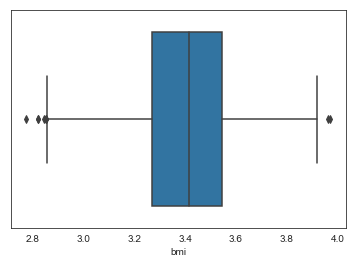

In [395]:
sns.boxplot(df_bmi_log)
# applying log transformation is not a good idea for this case.SThus we should apply winsorize method or drop outliers

### Tukey Rule

In [396]:
q1 = df["bmi"].quantile(.25)
q1

26.3

In [397]:
q3 = df["bmi"].quantile(.75)
q3

34.7

In [398]:
iqr = q3 - q1
iqr

8.400000000000002

In [399]:
ub = df["bmi"].quantile(.75) + 1.5 * iqr
ub

47.300000000000004

In [400]:
lb = df["bmi"].quantile(.25) - 1.5 * iqr
lb

13.699999999999998

In [401]:
outliers_low = df["bmi"] < lb

In [402]:
outliers_up = df["bmi"] > ub

In [403]:
df["bmi"][outliers_low] # there no low outlier smaller than lb

Series([], Name: bmi, dtype: float64)

In [404]:
df["bmi"][outliers_up]

116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64

In [405]:
len(df["bmi"]) - (len(df["bmi"][outliers_low]) + len(df["bmi"][outliers_up]))

1329

In [406]:
df["bmi"][outliers_low | outliers_up] #actually we don't need to write "outliers_low" because it's empty

116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64

In [407]:
df["bmi"][~(outliers_low | outliers_up)]

0       27.9
1       33.8
2       33.0
3       22.7
4       28.9
5       25.7
6       33.4
7       27.7
8       29.8
9       25.8
10      26.2
11      26.3
12      34.4
13      39.8
14      42.1
15      24.6
16      30.8
17      32.7
18      40.3
19      35.3
20      36.0
21      32.4
22      34.1
23      31.9
24      28.0
25      27.7
26      23.1
27      32.8
28      32.7
29      36.3
        ... 
1307    28.1
1308    30.2
1309    32.2
1310    26.3
1311    26.7
1312    42.9
1313    34.7
1314    23.7
1315    28.3
1316    20.6
1318    39.7
1319    26.3
1320    31.1
1321    26.7
1322    38.8
1323    40.4
1324    25.9
1325    33.5
1326    32.9
1327    30.0
1328    24.2
1329    38.6
1330    25.7
1331    33.4
1332    44.7
1333    31.0
1334    31.9
1335    36.9
1336    25.8
1337    29.1
Name: bmi, Length: 1329, dtype: float64

In [408]:
df = df[~(outliers_low | outliers_up)]

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
age                1329 non-null int64
sex                1329 non-null object
bmi                1329 non-null float64
child              1329 non-null int64
smoking            1329 non-null object
region             1329 non-null object
insurance_price    1329 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


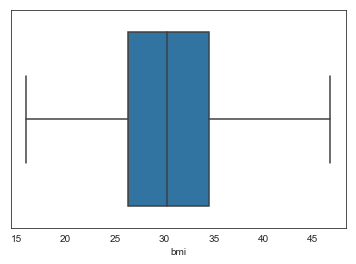

In [410]:
sns.boxplot(df["bmi"]) # now there is no outlier

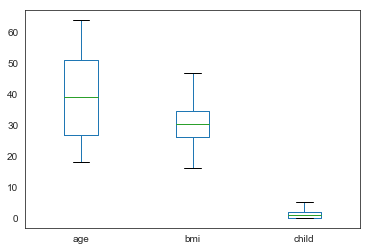

In [411]:
df.drop("insurance_price", axis=1).plot(kind="box")

### Visualization

In [412]:
df.groupby("smoking").mean()

,age,bmi,child,insurance_price
smoking,,,,
no,39.378072,30.570227,1.091682,8442.167316
yes,38.523985,30.508487,1.114391,31835.343985


In [413]:
df.groupby("sex").mean()

,age,bmi,child,insurance_price
sex,,,,
female,39.503030,30.303485,1.072727,12444.986348
male,38.908819,30.808371,1.119581,13969.357623


In [414]:
df.groupby("region").mean()

,age,bmi,child,insurance_price
region,,,,
northeast,39.247678,29.145201,1.043344,13418.686409
northwest,39.196923,29.248923,1.147692,12417.575169
southeast,38.935574,33.039216,1.058824,14629.138067
southwest,39.462963,30.544136,1.138889,12242.720093


In [415]:
df.groupby("smoking").describe().T

smoking                          no           yes
age             count   1058.000000    271.000000
                mean      39.378072     38.523985
                std       14.078600     13.932057
                min       18.000000     18.000000
                25%       27.000000     27.000000
                50%       40.000000     38.000000
                75%       52.000000     49.000000
                max       64.000000     64.000000
bmi             count   1058.000000    271.000000
                mean      30.570227     30.508487
                std        5.874840      6.040962
                min       16.000000     17.200000
                25%       26.300000     26.050000
                50%       30.300000     30.400000
                75%       34.375000     35.050000
                max       46.800000     46.200000
child           count   1058.000000    271.000000
                mean       1.091682      1.114391
                std        1.220337      1.160226
                min        0.000000      0.000000
                25%        0.000000      0.000000
                50%        1.000000      1.000000
                75%        2.000000      2.000000
                max        5.000000      5.000000
insurance_price count   1058.000000    271.000000
                mean    8442.167316  31835.343985
                std     6002.861386  11384.541944
                min     1121.870000  12829.460000
                25%     3988.407500  20759.810000
                50%     7341.415000  34303.170000
                75%    11363.150000  40936.860000
                max    36910.610000  62592.870000

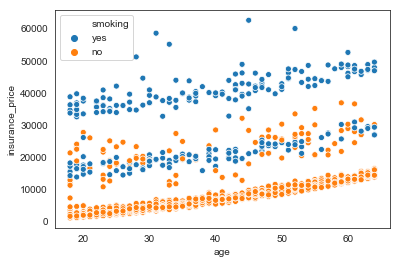

In [416]:
sns.scatterplot("age", "insurance_price", data=df, hue="smoking")

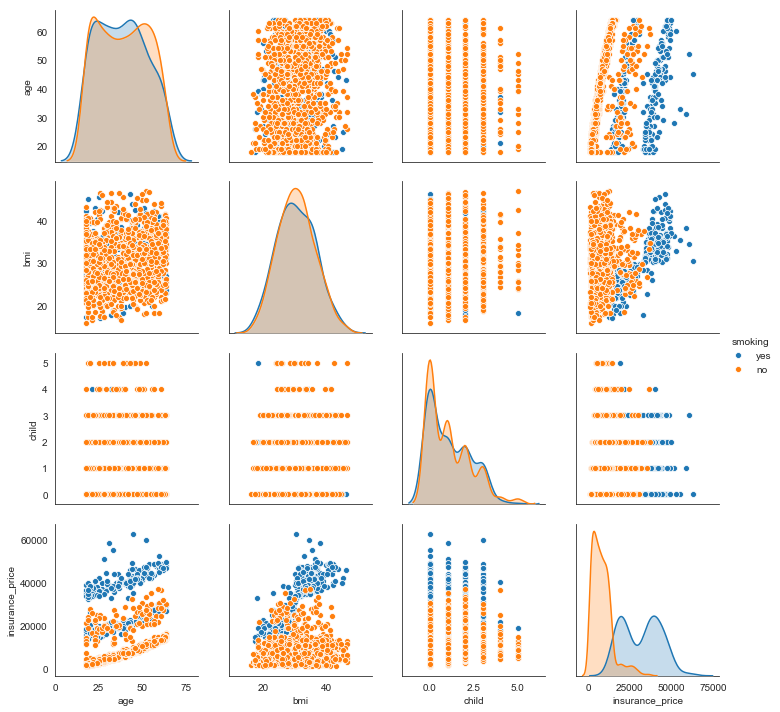

In [417]:
sns.pairplot(df, hue="smoking")

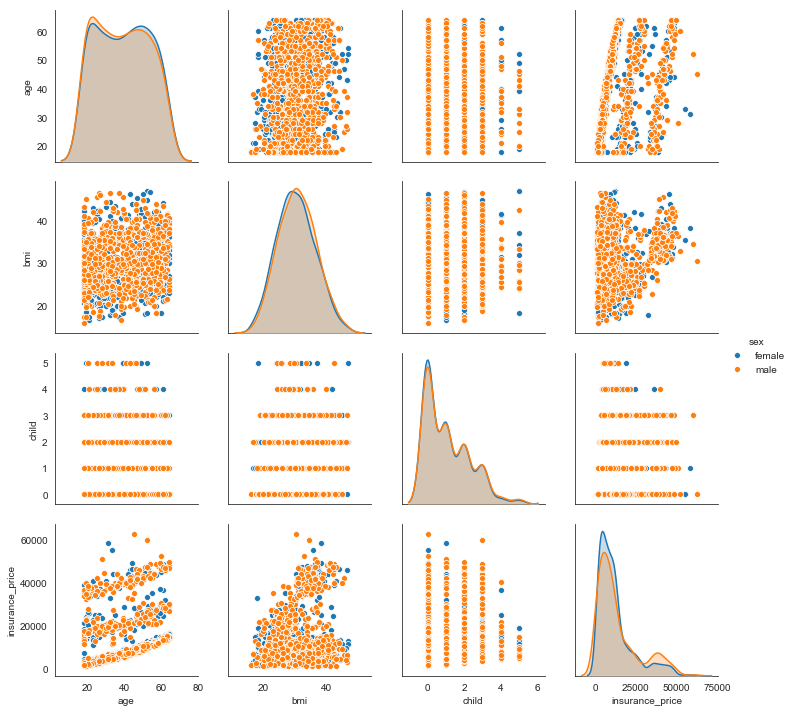

In [418]:
sns.pairplot(df, hue="sex")

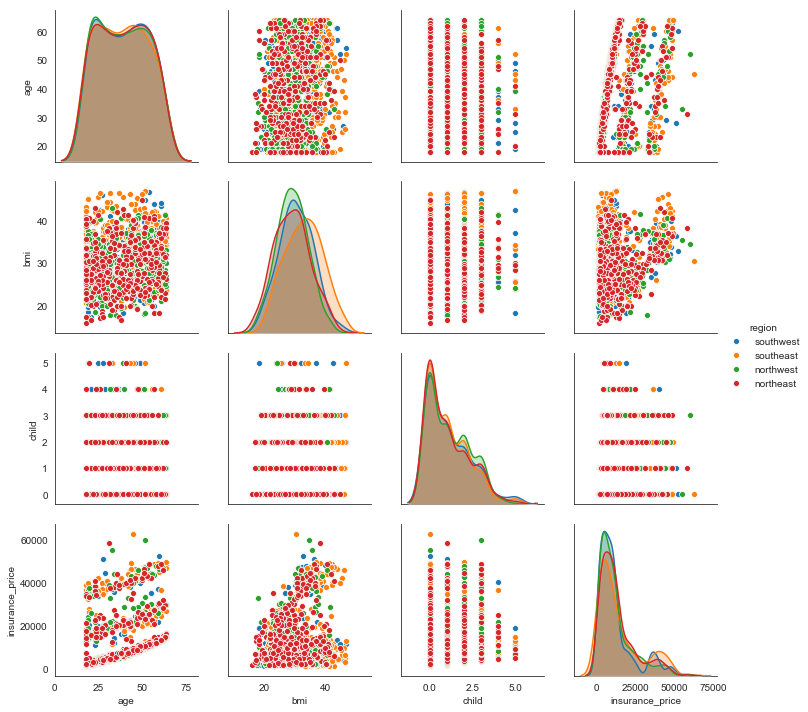

In [419]:
sns.pairplot(df, hue="region")

In [420]:
df[(df["smoking"]=="yes") & (df["bmi"] < 30) ]["insurance_price"].describe()

count      129.000000
mean     21363.216822
std       5066.780222
min      12829.460000
25%      17663.140000
50%      20167.340000
75%      24106.910000
max      38245.590000
Name: insurance_price, dtype: float64

In [421]:
df[(df["smoking"]=="yes") & (df["bmi"] > 30) ]["insurance_price"].describe()

count      140.000000
mean     41543.369071
std       5542.976887
min      32548.340000
25%      37243.902500
50%      40812.375000
75%      45182.225000
max      62592.870000
Name: insurance_price, dtype: float64

In [422]:
pd.cut(x=df["bmi"], bins=[0, 18.5, 24.9, 29.9, 99], labels=["Underweight", "Normal", "Overweight", "Obese"])

0       Overweight
1            Obese
2            Obese
3           Normal
4       Overweight
5       Overweight
6            Obese
7       Overweight
8       Overweight
9       Overweight
10      Overweight
11      Overweight
12           Obese
13           Obese
14           Obese
15          Normal
16           Obese
17           Obese
18           Obese
19           Obese
20           Obese
21           Obese
22           Obese
23           Obese
24      Overweight
25      Overweight
26          Normal
27           Obese
28           Obese
29           Obese
           ...    
1307    Overweight
1308         Obese
1309         Obese
1310    Overweight
1311    Overweight
1312         Obese
1313         Obese
1314        Normal
1315    Overweight
1316        Normal
1318         Obese
1319    Overweight
1320         Obese
1321    Overweight
1322         Obese
1323         Obese
1324    Overweight
1325         Obese
1326         Obese
1327         Obese
1328        Normal
1329        

In [423]:
segments = df.groupby(pd.cut(x=df["bmi"], bins=[0, 18.5, 24.9, 29.9, 99],
                  labels=["Underweight", "Normal", "Overweight", "Obese"]))

In [424]:
segments.mean()

,age,bmi,child,insurance_price
bmi,,,,
Underweight,32.850000,17.630000,1.050000,8951.743000
Normal,36.827273,22.600455,1.122727,10441.308000
Overweight,38.897172,27.581491,1.064267,11000.079306
Obese,40.302857,35.081714,1.107143,15434.339671


In [425]:
def transform(data):
    if (data["smoking"]=="yes") & (data["bmi"] > 30):
        return "smoking and obese"
    if (data["smoking"]=="yes") & (data["bmi"] < 30):
        return "smoking and normal"
    return "normal"

In [426]:
df["segments"] = df.apply(transform, axis=1)

C:\Users\gold\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


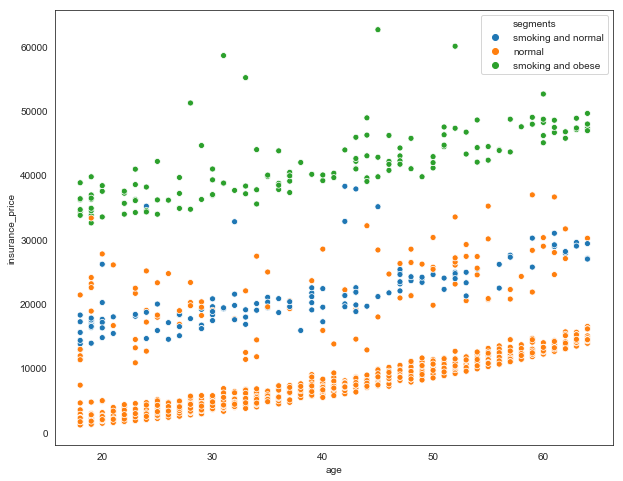

In [427]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="age", y="insurance_price", hue="segments", data=df)

### Visualization

In [428]:
sns.set_style("darkgrid")  #{darkgrid, whitegrid, dark, white, ticks}

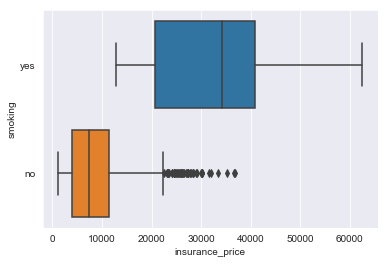

In [429]:
sns.boxplot(x="insurance_price", y="smoking", data=df)

In [430]:
sns.set_style("whitegrid")

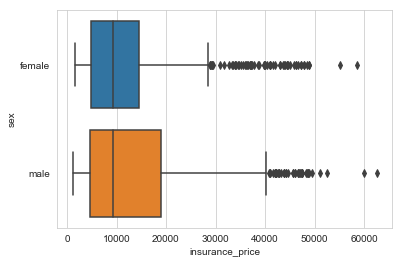

In [431]:
sns.boxplot(x="insurance_price", y="sex", data= df)

In [432]:
sns.set_style("dark")

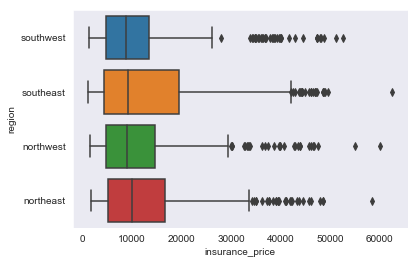

In [433]:
sns.boxplot(x="insurance_price", y="region", data=df)

In [434]:
sns.set_style("white")

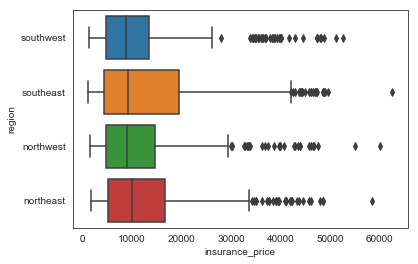

In [435]:
sns.boxplot(x="insurance_price", y="region", data=df)

In [436]:
df["region"].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

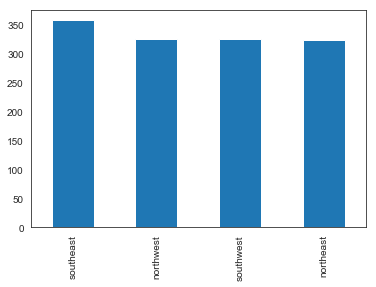

In [437]:
df["region"].value_counts().plot(kind="bar")

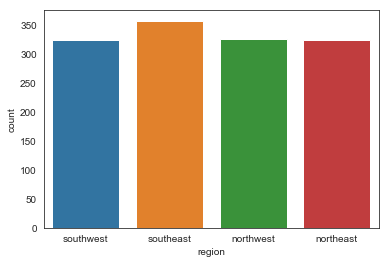

In [438]:
sns.countplot(df["region"])

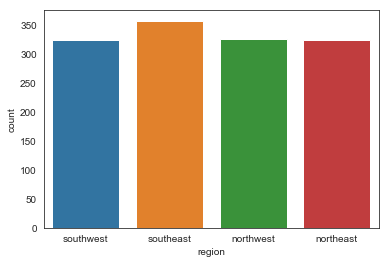

In [439]:
# sns.set(style="darkgrid")
# titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="region", data=df)

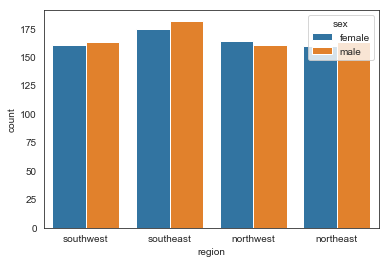

In [440]:
ax = sns.countplot(x="region", hue="sex", data=df)

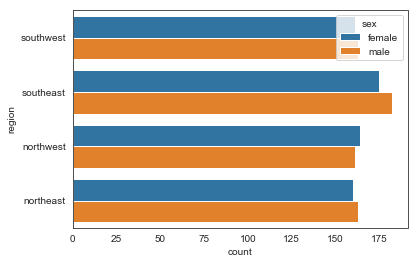

In [441]:
ax = sns.countplot(y="region", hue="sex", data=df)

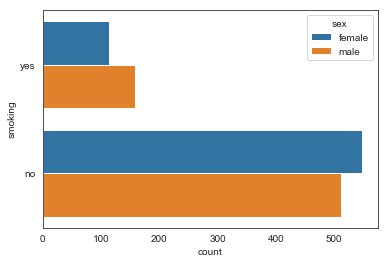

In [442]:
ax = sns.countplot(y="smoking", hue="sex", data=df)

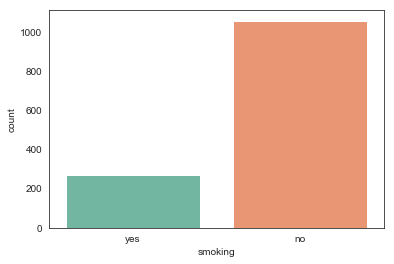

In [443]:
# Use a different color palette:

ax = sns.countplot(x="smoking", data=df, palette="Set2")

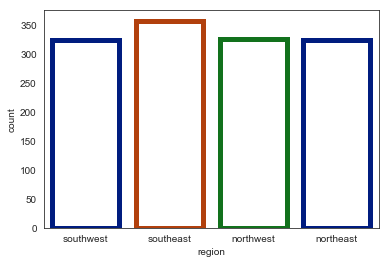

In [444]:
#Use ``plt.bar`` keyword arguments for a different look:

ax = sns.countplot(x="region", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

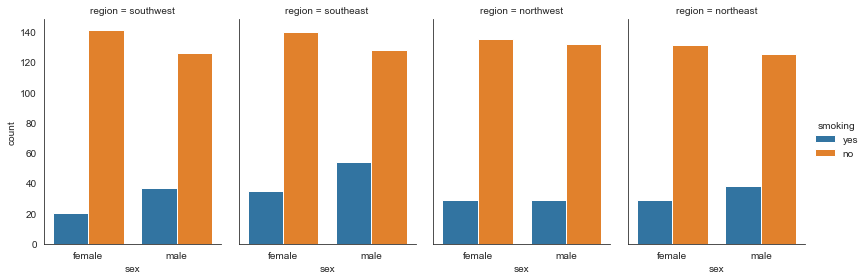

In [445]:
g = sns.catplot(x="sex", hue="smoking", col="region",
                data=df, kind="count",
                height=4, aspect=.7);

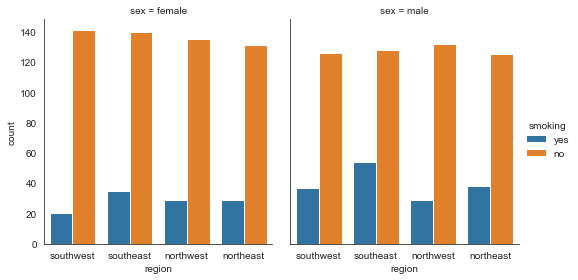

In [446]:
g = sns.catplot(x="region", hue="smoking", col="sex",
                data=df, kind="count",
                height=4, aspect=.9);

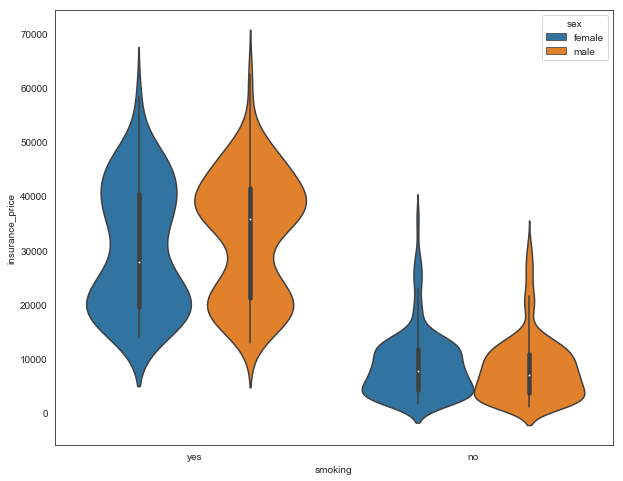

In [447]:
plt.figure(figsize=(10,8))
sns.violinplot(x="smoking", y= "insurance_price", hue="sex", data=df)

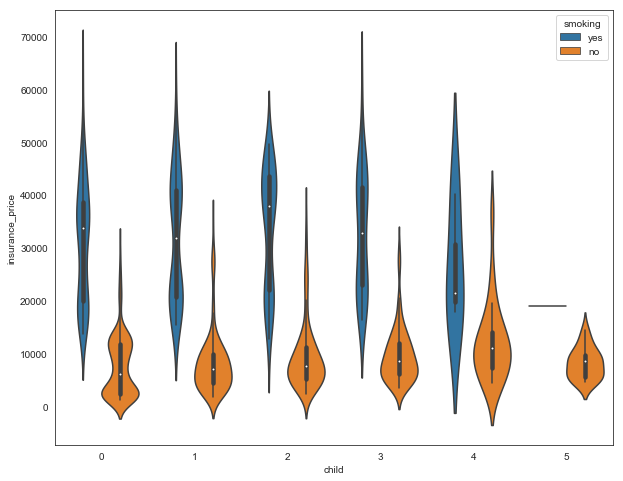

In [448]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='child', y='insurance_price', hue='smoking', data=df)

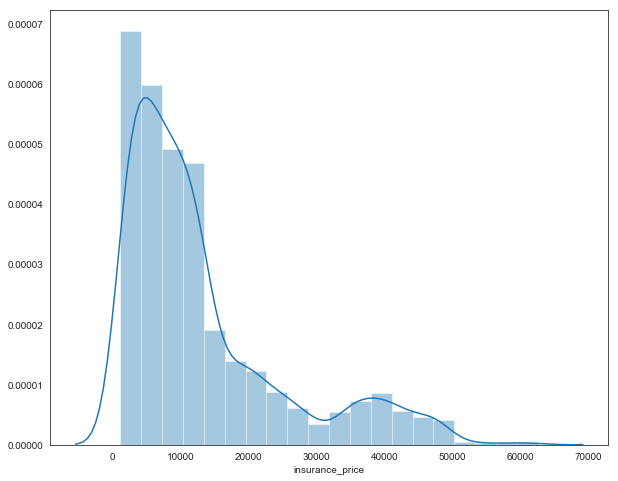

In [449]:
plt.figure(figsize=(10,8))
sns.distplot(df["insurance_price"], bins=20)

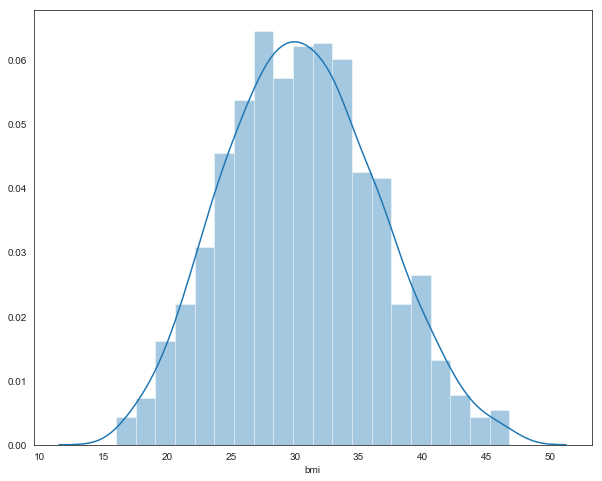

In [450]:
plt.figure(figsize=(10,8))
sns.distplot(df["bmi"], bins=20)

### Encoding

In [451]:
df.head()

,age,sex,bmi,child,smoking,region,insurance_price,segments
0,19,female,27.9,0,yes,southwest,16884.92,smoking and normal
1,18,male,33.8,1,no,southeast,1725.55,normal
2,28,male,33.0,3,no,southeast,4449.46,normal
3,33,male,22.7,0,no,northwest,21984.47,normal
4,32,male,28.9,0,no,northwest,3866.86,normal


In [452]:
pd.get_dummies(data=df, drop_first=True)

,age,bmi,child,insurance_price,sex_male,smoking_yes,region_northwest,region_southeast,region_southwest,segments_smoking and normal,segments_smoking and obese
0,19,27.9,0,16884.92,0,1,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,1,0,0,0
2,28,33.0,3,4449.46,1,0,0,1,0,0,0
3,33,22.7,0,21984.47,1,0,1,0,0,0,0
4,32,28.9,0,3866.86,1,0,1,0,0,0,0
5,31,25.7,0,3756.62,0,0,0,1,0,0,0
6,46,33.4,1,8240.59,0,0,0,1,0,0,0
7,37,27.7,3,7281.51,0,0,1,0,0,0,0
8,37,29.8,2,6406.41,1,0,0,0,0,0,0
9,60,25.8,0,28923.14,0,0,1,0,0,0,0


In [453]:
df = pd.get_dummies(data=df, drop_first=True)

In [454]:
df.corr()

,age,bmi,child,insurance_price,sex_male,smoking_yes,region_northwest,region_southeast,region_southwest,segments_smoking and normal,segments_smoking and obese
age,1.000000,0.111456,0.043041,0.302022,-0.021157,-0.024505,-0.000283,-0.011581,0.010474,-0.032091,0.001824
bmi,0.111456,1.000000,0.016086,0.191157,0.042752,-0.004213,-0.126104,0.254705,-0.001298,-0.291042,0.275598
child,0.043041,0.016086,1.000000,0.069739,0.019401,0.007577,0.024209,-0.018816,0.020021,0.009631,0.005108
insurance_price,0.302022,0.191157,0.069739,1.000000,0.063553,0.785912,-0.037704,0.071597,-0.045906,0.222839,0.810621
sex_male,-0.021157,0.042752,0.019401,0.063553,1.000000,0.080614,-0.009105,0.007779,-0.000340,0.005405,0.100621
smoking_yes,-0.024505,-0.004213,0.007577,0.785912,0.080614,1.000000,-0.035940,0.068270,-0.039440,0.647832,0.678002
region_northwest,-0.000283,-0.126104,0.024209,-0.037704,-0.009105,-0.035940,1.000000,-0.344807,-0.323046,0.020423,-0.069777
region_southeast,-0.011581,0.254705,-0.018816,0.071597,0.007779,0.068270,-0.344807,1.000000,-0.344105,-0.009475,0.101707
region_southwest,0.010474,-0.001298,0.020021,-0.045906,-0.000340,-0.039440,-0.323046,-0.344105,1.000000,-0.050015,-0.006456
segments_smoking and normal,-0.032091,-0.291042,0.009631,0.222839,0.005405,0.647832,0.020423,-0.009475,-0.050015,1.000000,-0.112506


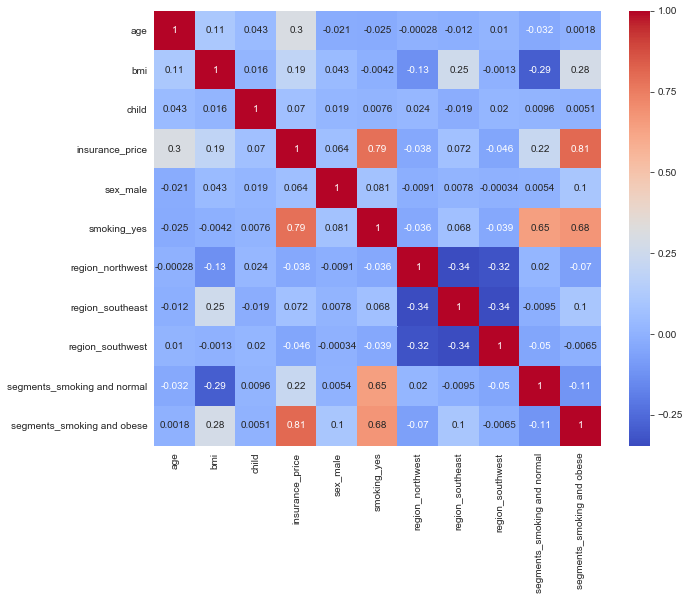

In [455]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [456]:
df.head()

,age,bmi,child,insurance_price,sex_male,smoking_yes,region_northwest,region_southeast,region_southwest,segments_smoking and normal,segments_smoking and obese
0,19,27.9,0,16884.92,0,1,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,1,0,0,0
2,28,33.0,3,4449.46,1,0,0,1,0,0,0
3,33,22.7,0,21984.47,1,0,1,0,0,0,0
4,32,28.9,0,3866.86,1,0,1,0,0,0,0


### Feature Scaling

In [457]:
x = df.drop("insurance_price", axis=1)
y = df["insurance_price"]

In [458]:
from sklearn.model_selection import train_test_split

In [459]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=34)

In [460]:
x_train.shape

(1063, 10)

In [461]:
from sklearn.preprocessing import StandardScaler

In [462]:
scaler = StandardScaler()

In [463]:
# we apply scaler to the numeric columns not to the dummy variables
x_train.iloc[:,0:2] = scaler.fit_transform(x_train.iloc[:,0:2])
x_test.iloc[:,0:2] = scaler.transform(x_test.iloc[:,0:2])

C:\Users\gold\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gold\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\gold\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\gold\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from

In [464]:
x_train

,age,bmi,child,sex_male,smoking_yes,region_northwest,region_southeast,region_southwest,segments_smoking and normal,segments_smoking and obese
45,1.126309,1.145577,0,1,0,0,0,1,0,0
953,0.352154,-0.044744,2,1,1,0,0,1,0,1
1092,-1.125780,0.374383,3,1,0,0,0,1,0,0
730,-0.281246,-1.017118,3,1,1,0,1,0,1,0
1023,-1.477669,-1.201534,1,1,0,0,1,0,0,0
320,-0.351624,-0.866233,1,1,0,1,0,0,0,0
494,-1.266535,-0.799172,4,1,1,0,0,1,1,0
975,-0.703513,-1.268595,0,1,1,0,0,0,1,0
327,0.422532,1.011456,2,1,1,1,0,0,0,1
98,1.196687,-1.754782,0,1,1,0,0,0,1,0


In [465]:
x_test

,age,bmi,child,sex_male,smoking_yes,region_northwest,region_southeast,region_southwest,segments_smoking and normal,segments_smoking and obese
1194,-0.562757,-1.453011,0,0,0,1,0,0,0,0
289,0.915176,-0.681817,3,1,0,0,1,0,0,0
675,0.422532,-1.520071,0,1,0,1,0,0,0,0
49,-0.210869,0.793510,1,1,1,0,1,0,0,1
668,1.618954,0.257028,0,1,1,0,0,0,0,1
131,1.548576,-1.419480,0,0,0,0,0,0,0,0
450,0.000265,-0.145334,4,1,0,0,0,1,0,0
468,-0.773891,-1.033884,1,0,0,0,0,0,0,0
758,-0.633135,1.162342,3,1,0,0,0,0,0,0
294,-0.985024,-0.614756,3,1,0,0,0,1,0,0
